In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.applications.resnet50 import preprocess_input

from unsupcon_loss import get_aug_seq
from unsupcon_loss import sim, contrastive_loss

2021-12-08 20:50:30.358113: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-08 20:50:30.398633: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-08 20:50:30.398980: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-08 20:50:30.399795: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

(100, 32, 32, 3)


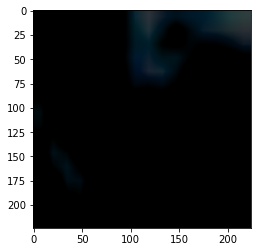

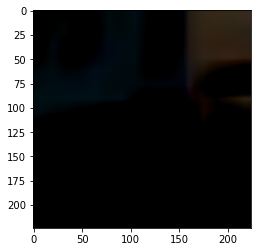

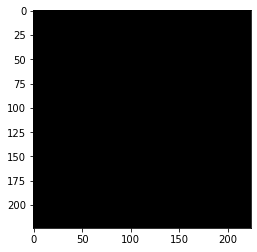

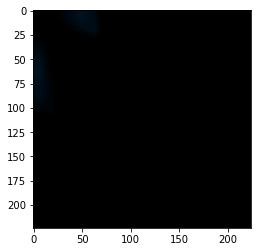

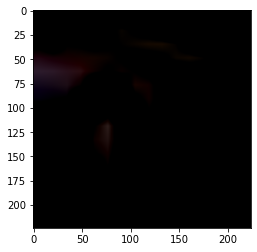

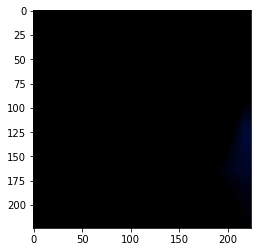

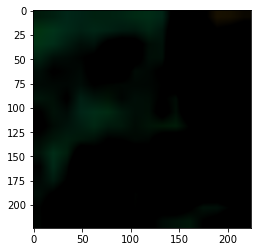

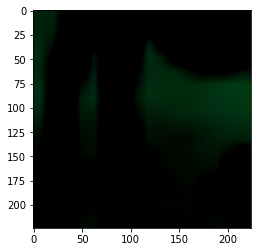

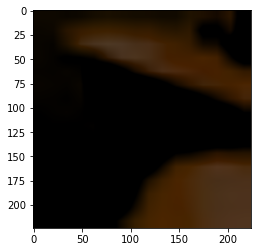

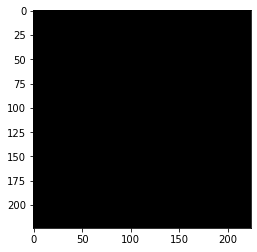

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()
X = X_train[:100]
X = preprocess_input(X)
X = tf.math.multiply(1./255, X)
print(np.shape(X))
N = 10
X_batches = tf.data.Dataset.from_tensor_slices(X).batch(N).take(1)
for batch in X_batches:
    aug_seq = get_aug_seq(np.size(X, 1), np.size(X, 2))
    batch = aug_seq(batch)
    for img in batch:
        plt.figure()
        plt.imshow(img)

In [3]:
for batch in X_batches:
    b_shape = tf.shape(batch)
    batch_l = tf.reshape(batch, (b_shape[0], b_shape[1] * b_shape[2], b_shape[3]))
    batch_z = tf.math.reduce_mean(batch_l, axis=2) #this is a bad encoding for demo purposes only
    print(tf.shape(batch_z))
    for k in range(N - 1):
        print(f"sim: {sim(batch_z[k], batch_z[k+1])}")
        print(f"unsupcon loss: {contrastive_loss(batch_z, k, k+1)}")

tf.Tensor([  10 1024], shape=(2,), dtype=int32)
sim: 0.0644194483757019
unsupcon loss: 2.146930694580078
sim: -0.008911781944334507
unsupcon loss: 2.256009101867676
sim: -0.3740876615047455
unsupcon loss: 2.5987460613250732
sim: 0.2184361070394516
unsupcon loss: 2.040330410003662
sim: 0.17024372518062592
unsupcon loss: 2.1727967262268066
sim: 0.1812833845615387
unsupcon loss: 2.1260228157043457
sim: 0.0001990367891266942
unsupcon loss: 2.2424073219299316
sim: 0.06223734840750694
unsupcon loss: 2.067183017730713
sim: -0.252394437789917
unsupcon loss: 2.3986623287200928


(100, 32, 32, 3)


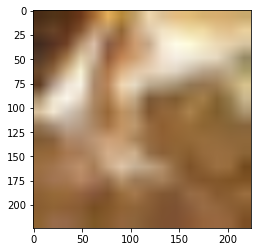

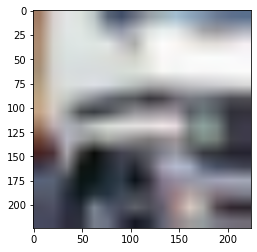

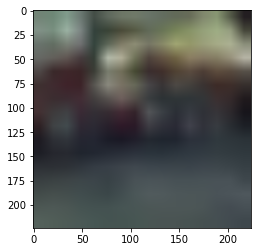

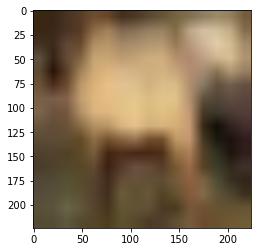

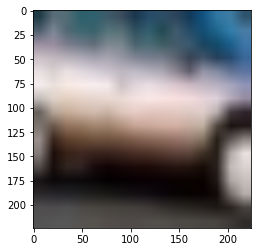

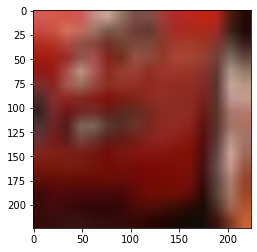

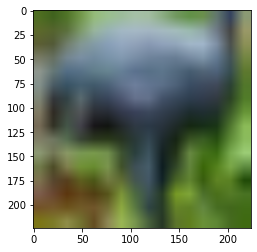

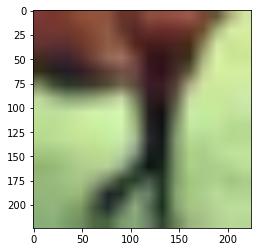

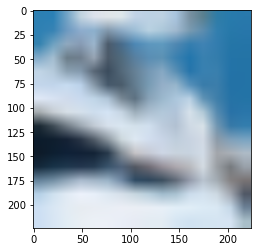

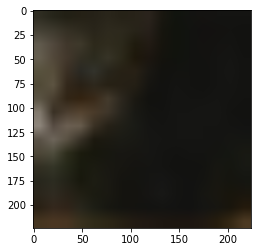

In [4]:
X = X_train[:100]
X = tf.math.multiply(1./255, X)
print(np.shape(X))
N = 10
X_batches = tf.data.Dataset.from_tensor_slices(X).batch(N).take(1)
for batch in X_batches:
    batch = aug_seq(batch)
    for img in batch:
        plt.figure()
        plt.imshow(img)

In [5]:
for batch in X_batches:
    b_shape = tf.shape(batch)
    batch_l = tf.reshape(batch, (b_shape[0], b_shape[1] * b_shape[2], b_shape[3]))
    batch_z = tf.math.reduce_mean(batch_l, axis=2) #this is a bad encoding for demo purposes only
    print(tf.shape(batch_z))
    for k in range(N - 1):
        print(f"sim: {sim(batch_z[k], batch_z[k+1])}")
        print(f"unsupcon loss: {contrastive_loss(batch_z, k, k+1)}")

tf.Tensor([  10 1024], shape=(2,), dtype=int32)
sim: 0.8707793951034546
unsupcon loss: 2.155802011489868
sim: 0.7601520419120789
unsupcon loss: 2.271296739578247
sim: 0.732897162437439
unsupcon loss: 2.2527501583099365
sim: 0.8331568837165833
unsupcon loss: 2.1950721740722656
sim: 0.8076869249343872
unsupcon loss: 2.20884108543396
sim: 0.8964330554008484
unsupcon loss: 2.1296112537384033
sim: 0.8646959066390991
unsupcon loss: 2.1909661293029785
sim: 0.86432945728302
unsupcon loss: 2.1427760124206543
sim: 0.7751156091690063
unsupcon loss: 2.278573513031006
